# ¿?

# Librerías

In [1674]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Constantes

In [1675]:
COLORES = ["cornflowerblue", "midnightblue", "forestgreen", "brown"]

# Ficheros
fichero_fondo_06 = 'data/fondo_06011702.csv'
fichero_fondo_16 = 'data/fondo_16061107.csv'
fichero_fondo_26 = 'data/fondo_26040406.csv'
fichero_fondo_19 = 'data/fondo_103319.csv'
fichero_fondo_22 = 'data/fondo_103322.csv'

fichero_superficie_06 = 'data/superficie_06010702.csv'
fichero_superficie_16 = 'data/superficie_16061107.csv'
fichero_superficie_26 = 'data/superficie_26040604.csv'
fichero_superficie_32 = 'data/superficie_103326.csv'
fichero_superficie_29 = 'data/superficie_103329.csv'

fichero_ambiente = 'data/ambiente_2022-2023.csv'
fichero_ambiente_13 = 'data/ambiente_103313.csv'

fichero_nivel = 'data/nivel_laguna-data-20_07_2023-11_04_02.csv'
fichero_nivel_lag = 'data/nivel_laguna.csv'

# Carga de datos

## - Tª fondo

In [1676]:
data_fondo_06 = pd.read_csv(fichero_fondo_06)
data_fondo_06.rename(columns={'fondo s2': 'fondo'}, inplace=True)

data_fondo_16= pd.read_csv(fichero_fondo_16)

data_fondo_26 = pd.read_csv(fichero_fondo_26)
data_fondo_26.rename(columns={'fondo s22': 'fondo'}, inplace=True)

data_fondo_19 = pd.read_csv(fichero_fondo_19)
data_fondo_19.rename(columns={'fondo s22': 'fondo'}, inplace=True)

data_fondo_22 = pd.read_csv(fichero_fondo_22)
data_fondo_22.rename(columns={'fondo s2': 'fondo'}, inplace=True)

data_fondo = pd.concat([data_fondo_16,
                        data_fondo_06,
                        data_fondo_26, 
                        data_fondo_19,
                        data_fondo_22], ignore_index=True)
data_fondo.rename(columns={'Time': 'date'}, inplace=True)

data_fondo['date'] = pd.to_datetime(data_fondo['date'])  
data_fondo = data_fondo.sort_values(by='date')

# Reiniciar los índices después de ordenar
data_fondo = data_fondo.reset_index(drop=True)

print(data_fondo)

                    date  fondo
0    2023-01-06 15:30:00    NaN
1    2023-01-06 16:00:00    NaN
2    2023-01-06 16:30:00    NaN
3    2023-01-06 17:00:00    NaN
4    2023-01-06 17:30:00    NaN
...                  ...    ...
7838 2023-09-14 08:00:00  28.75
7839 2023-09-14 09:00:00  28.69
7840 2023-09-14 09:00:00  28.81
7841 2023-09-14 10:00:00  28.83
7842 2023-09-14 10:00:00  28.73

[7843 rows x 2 columns]


Comprobando si hay valores nulos y eliminandolos

In [1677]:
nan_count_before = data_fondo['fondo'].isna().sum()

data_fondo = data_fondo.dropna(subset=['fondo'])

nan_count_after = data_fondo['fondo'].isna().sum()

print("Cantidad de NaN en 'fondo' antes de la eliminación:", nan_count_before)
print("Cantidad de NaN en 'fondo' después de la eliminación:", nan_count_after)

Cantidad de NaN en 'fondo' antes de la eliminación: 110
Cantidad de NaN en 'fondo' después de la eliminación: 0


Comprobando si hay fechas duplicadas

In [1678]:
# hay_duplicados = data_fondo['date'].duplicated().any()

# if hay_duplicados:
#     print("Hay fechas duplicadas en la columna 'date'.")
# else:
#     print("No hay fechas duplicadas en la columna 'date'.")

In [1679]:
# print(data_fondo.info())

# data_fondo = data_fondo.groupby('date').mean(numeric_only = True).reset_index()

# data_fondo.info()

## - Tª superficie

In [1680]:
data_superficie_06 = pd.read_csv(fichero_superficie_06)
data_superficie_06.rename(columns={'superficie s1': 'superficie'}, inplace=True)

data_superficie_16= pd.read_csv(fichero_superficie_16)

data_superficie_26 = pd.read_csv(fichero_superficie_26)
data_superficie_26.rename(columns={'superficie s1': 'superficie'}, inplace=True)

data_superficie_32 = pd.read_csv(fichero_superficie_32)
data_superficie_32.rename(columns={'superficie s1': 'superficie'}, inplace=True)

data_superficie_29 = pd.read_csv(fichero_superficie_29)
data_superficie_29.rename(columns={'superficie s11': 'superficie'}, inplace=True)

data_superficie = pd.concat([data_superficie_16,
                             data_superficie_06,
                             data_superficie_26,
                             data_superficie_29,
                             data_superficie_32], ignore_index=True)
data_superficie.rename(columns={'Time': 'date'}, inplace=True)

data_superficie['date'] = pd.to_datetime(data_superficie['date'])  
data_superficie = data_superficie.sort_values(by='date')

# Reiniciar los índices después de ordenar
data_superficie = data_superficie.reset_index(drop=True)

print(data_superficie)

                    date  superficie
0    2023-01-06 15:30:00         NaN
1    2023-01-06 16:00:00         NaN
2    2023-01-06 16:30:00         NaN
3    2023-01-06 17:00:00         NaN
4    2023-01-06 17:30:00         NaN
...                  ...         ...
7838 2023-09-14 08:00:00       28.55
7839 2023-09-14 09:00:00       28.49
7840 2023-09-14 09:00:00       28.55
7841 2023-09-14 10:00:00       28.58
7842 2023-09-14 10:00:00       28.50

[7843 rows x 2 columns]


Comprobando si hay valores nulos y eliminandolos

In [1681]:
nan_count_before = data_superficie['superficie'].isna().sum()

data_superficie = data_superficie.dropna(subset=['superficie'])

nan_count_after = data_superficie['superficie'].isna().sum()

print("Cantidad de NaN en 'superficie' antes de la eliminación:", nan_count_before)
print("Cantidad de NaN en 'superficie' después de la eliminación:", nan_count_after)

Cantidad de NaN en 'superficie' antes de la eliminación: 112
Cantidad de NaN en 'superficie' después de la eliminación: 0


Comprobando si hay fechas duplicadas

In [1682]:
# hay_duplicados = data_superficie['date'].duplicated().any()

# if hay_duplicados:
#     print("Hay fechas duplicadas en la columna 'date'.")
# else:
#     print("No hay fechas duplicadas en la columna 'date'.")

In [1683]:
# print(data_superficie.info())

# data_superficie = data_superficie.groupby('date').mean(numeric_only = True).reset_index()

# data_superficie.info()

## - Tª ambiente

In [1684]:
data_ambiente_22 = pd.read_csv(fichero_ambiente)
data_ambiente_22.rename(columns={'lama.mean': 'ambiente'}, inplace=True)
data_ambiente_22.rename(columns={'Time': 'date'}, inplace=True)
data_ambiente_22['date'] = pd.to_datetime(data_ambiente_22['date'], format="%d/%m/%Y, %H:%M:%S")  

data_ambiente_13 = pd.read_csv(fichero_ambiente_13)
data_ambiente_13.rename(columns={'TEMPERATURA AMBIENTE': 'ambiente'}, inplace=True)
data_ambiente_13.rename(columns={'Time': 'date'}, inplace=True)
data_ambiente_13['date'] = pd.to_datetime(data_ambiente_13['date'], format="%Y-%m-%d %H:%M:%S")  


data_ambiente = pd.concat([data_ambiente_22,
                           data_ambiente_13], ignore_index=True)

data_ambiente = data_ambiente.sort_values(by='date')

# Reiniciar los índices después de ordenar
data_ambiente = data_ambiente.reset_index(drop=True)

print(data_ambiente)

                    date  ambiente
0    2022-09-24 20:00:00       NaN
1    2022-09-25 02:00:00       NaN
2    2022-09-25 08:00:00       NaN
3    2022-09-25 14:00:00       NaN
4    2022-09-25 20:00:00       NaN
...                  ...       ...
2750 2023-09-14 06:00:00     24.49
2751 2023-09-14 07:00:00     25.06
2752 2023-09-14 08:00:00     25.33
2753 2023-09-14 09:00:00     26.13
2754 2023-09-14 10:00:00     26.45

[2755 rows x 2 columns]


Comprobando si hay valores nulos y eliminandolos

In [1685]:
nan_count_before = data_ambiente['ambiente'].isna().sum()

data_ambiente = data_ambiente.dropna(subset=['ambiente'])

nan_count_after = data_ambiente['ambiente'].isna().sum()

print("Cantidad de NaN en 'ambiente' antes de la eliminación:", nan_count_before)
print("Cantidad de NaN en 'ambiente' después de la eliminación:", nan_count_after)

Cantidad de NaN en 'ambiente' antes de la eliminación: 160
Cantidad de NaN en 'ambiente' después de la eliminación: 0


Comprobando si hay fechas duplicadas

In [1686]:
# hay_duplicados = data_fondo['date'].duplicated().any()

# if hay_duplicados:
#     print("Hay fechas duplicadas en la columna 'date'.")
# else:
#     print("No hay fechas duplicadas en la columna 'date'.")

In [1687]:
# print(data_ambiente.info())

# data_ambiente = data_ambiente.groupby('date').mean(numeric_only = True).reset_index()

# data_ambiente.info()

## - Nivel del agua

In [1688]:
data_nivel_20 = pd.read_csv(fichero_nivel)
data_nivel_20.rename(columns={'Altura lamina ': 'nivel'}, inplace=True)
data_nivel_20.rename(columns={'Time': 'date'}, inplace=True)
data_nivel_20['date'] = pd.to_datetime(data_nivel_20['date'], format="%d/%m/%Y, %H:%M:%S")  


data_nivel_lag = pd.read_csv(fichero_nivel_lag)
data_nivel_lag.rename(columns={'NIVEL CADA HORA': 'nivel'}, inplace=True)
data_nivel_lag.rename(columns={'Time': 'date'}, inplace=True)
data_nivel_lag['date'] = pd.to_datetime(data_nivel_lag['date'], format="%Y-%m-%d %H:%M:%S")  


data_nivel = pd.concat([data_nivel_20,
                        data_nivel_lag], ignore_index=True)


data_nivel = data_nivel.sort_values(by='date')

# Reiniciar los índices después de ordenar
data_nivel = data_nivel.reset_index(drop=True)

print(data_nivel)

                    date  nivel
0    2022-09-21 02:00:00    NaN
1    2022-09-22 02:00:00    NaN
2    2022-09-23 02:00:00    NaN
3    2022-09-24 02:00:00    NaN
4    2022-09-25 02:00:00    NaN
...                  ...    ...
2459 2023-09-14 06:00:00   34.0
2460 2023-09-14 07:00:00   41.0
2461 2023-09-14 08:00:00   34.0
2462 2023-09-14 09:00:00   33.0
2463 2023-09-14 10:00:00    NaN

[2464 rows x 2 columns]


Comprobando si hay valores nulos y eliminandolos

In [1689]:
nan_count_before = data_nivel['nivel'].isna().sum()

data_nivel = data_nivel.dropna(subset=['nivel'])

nan_count_after = data_nivel['nivel'].isna().sum()

print("Cantidad de NaN en 'nivel' antes de la eliminación:", nan_count_before)
print("Cantidad de NaN en 'nivel' después de la eliminación:", nan_count_after)

Cantidad de NaN en 'nivel' antes de la eliminación: 86
Cantidad de NaN en 'nivel' después de la eliminación: 0


Comprobando si hay fechas duplicadas

In [1690]:
# hay_duplicados = data_nivel['date'].duplicated().any()

# if hay_duplicados:
#     print("Hay fechas duplicadas en la columna 'date'.")
# else:
#     print("No hay fechas duplicadas en la columna 'date'.")

In [1691]:
# print(data_nivel.info())

# data_nivel = data_nivel.groupby('date').mean(numeric_only = True).reset_index()

# data_nivel.info()

# Unificación de las fuentes de datos

In [1692]:
data = pd.concat([data_fondo, data_superficie, data_ambiente, data_nivel], ignore_index=True)

data = data.sort_values(by='date').reset_index(drop=True)

data

,date,fondo,superficie,ambiente,nivel
0,2022-09-26 02:00:00,NaN,NaN,NaN,40.3
1,2022-09-26 02:00:00,NaN,NaN,20.474,NaN
2,2022-09-26 08:00:00,NaN,NaN,22.608,NaN
3,2022-09-26 14:00:00,NaN,NaN,24.422,NaN
4,2022-09-26 20:00:00,NaN,NaN,18.580,NaN
...,...,...,...,...,...
20432,2023-09-14 10:00:00,NaN,28.58,NaN,NaN
20433,2023-09-14 10:00:00,28.73,NaN,NaN,NaN
20434,2023-09-14 10:00:00,NaN,NaN,26.450,NaN
20435,2023-09-14 10:00:00,NaN,28.50,NaN,NaN


Comprobando si hay fechas duplicadas

In [1693]:
hay_duplicados = data['date'].duplicated().any()

if hay_duplicados:
    print("Hay fechas duplicadas en la columna 'date'.")

    filas_duplicadas = data[data.duplicated(subset=['date'], keep=False)]

    print("Filas con fechas duplicadas:")
    print(filas_duplicadas["date"])
else:
    print("No hay fechas duplicadas en la columna 'date'.")

Hay fechas duplicadas en la columna 'date'.
Filas con fechas duplicadas:
0       2022-09-26 02:00:00
1       2022-09-26 02:00:00
9       2022-09-28 02:00:00
10      2022-09-28 02:00:00
14      2022-09-29 02:00:00
                ...        
20432   2023-09-14 10:00:00
20433   2023-09-14 10:00:00
20434   2023-09-14 10:00:00
20435   2023-09-14 10:00:00
20436   2023-09-14 10:00:00
Name: date, Length: 19909, dtype: datetime64[ns]


In [1694]:
# data['superficie'] = data['superficie'].str.replace('°C', '', regex=True).astype(float)
# data['fondo'] = data['fondo'].str.replace('°C', '', regex=True).astype(float)
# data['ambiente'] = data['ambiente'].str.replace('°C', '', regex=False).astype(float)
# data['nivel'] = data['nivel'].str.replace('cm', '', regex=True).astype(float)

data

,date,fondo,superficie,ambiente,nivel
0,2022-09-26 02:00:00,NaN,NaN,NaN,40.3
1,2022-09-26 02:00:00,NaN,NaN,20.474,NaN
2,2022-09-26 08:00:00,NaN,NaN,22.608,NaN
3,2022-09-26 14:00:00,NaN,NaN,24.422,NaN
4,2022-09-26 20:00:00,NaN,NaN,18.580,NaN
...,...,...,...,...,...
20432,2023-09-14 10:00:00,NaN,28.58,NaN,NaN
20433,2023-09-14 10:00:00,28.73,NaN,NaN,NaN
20434,2023-09-14 10:00:00,NaN,NaN,26.450,NaN
20435,2023-09-14 10:00:00,NaN,28.50,NaN,NaN


In [1695]:
data.head(5)

,date,fondo,superficie,ambiente,nivel
0,2022-09-26 02:00:00,NaN,NaN,NaN,40.3
1,2022-09-26 02:00:00,NaN,NaN,20.474,NaN
2,2022-09-26 08:00:00,NaN,NaN,22.608,NaN
3,2022-09-26 14:00:00,NaN,NaN,24.422,NaN
4,2022-09-26 20:00:00,NaN,NaN,18.580,NaN


In [1696]:
data.isnull().sum()

date              0
fondo         12704
superficie    12706
ambiente      17842
nivel         18059
dtype: int64

In [1697]:
nan_values = data.shape[0]

data = data.dropna(subset=[col for col in data.columns if col != 'date'], how='all')

print()
print('Total de valores NAN:', str(nan_values - data.shape[0]))
print()


Total de valores NAN: 0



In [1698]:
data

,date,fondo,superficie,ambiente,nivel
0,2022-09-26 02:00:00,NaN,NaN,NaN,40.3
1,2022-09-26 02:00:00,NaN,NaN,20.474,NaN
2,2022-09-26 08:00:00,NaN,NaN,22.608,NaN
3,2022-09-26 14:00:00,NaN,NaN,24.422,NaN
4,2022-09-26 20:00:00,NaN,NaN,18.580,NaN
...,...,...,...,...,...
20432,2023-09-14 10:00:00,NaN,28.58,NaN,NaN
20433,2023-09-14 10:00:00,28.73,NaN,NaN,NaN
20434,2023-09-14 10:00:00,NaN,NaN,26.450,NaN
20435,2023-09-14 10:00:00,NaN,28.50,NaN,NaN


In [1699]:
# !pip list

In [1700]:
data_final = data.groupby('date').mean(numeric_only = True).reset_index()
data_final = data_final[["date","fondo","superficie","ambiente","nivel"]]
print(data_final)


                    date   fondo  superficie  ambiente  nivel
0    2022-09-26 02:00:00     NaN         NaN    20.474   40.3
1    2022-09-26 08:00:00     NaN         NaN    22.608    NaN
2    2022-09-26 14:00:00     NaN         NaN    24.422    NaN
3    2022-09-26 20:00:00     NaN         NaN    18.580    NaN
4    2022-09-27 02:00:00     NaN         NaN       NaN   43.5
...                  ...     ...         ...       ...    ...
6911 2023-09-14 06:00:00  28.985      28.740    24.490   34.0
6912 2023-09-14 07:00:00  28.875      28.650    25.060   41.0
6913 2023-09-14 08:00:00  28.795      28.575    25.330   34.0
6914 2023-09-14 09:00:00  28.750      28.520    26.130   33.0
6915 2023-09-14 10:00:00  28.780      28.540    26.450    NaN

[6916 rows x 5 columns]


In [1701]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6916 entries, 0 to 6915
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        6916 non-null   datetime64[ns]
 1   fondo       6217 non-null   float64       
 2   superficie  6215 non-null   float64       
 3   ambiente    2559 non-null   float64       
 4   nivel       2344 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 270.3 KB


In [1702]:
data_final.isnull().sum()

date             0
fondo          699
superficie     701
ambiente      4357
nivel         4572
dtype: int64

In [1703]:
data_final.to_csv('data/datos_laguna_unificados.csv', index=False)

C:\Users\Vir\AppData\Local\Temp\ipykernel_10964\2853987471.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['fecha_hora'] = pd.to_datetime(data_final['date'], format='%Y-%m-%d %H:%M:%S')
C:\Users\Vir\AppData\Local\Temp\ipykernel_10964\2853987471.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['fecha'] = data_final['fecha_hora'].dt.date


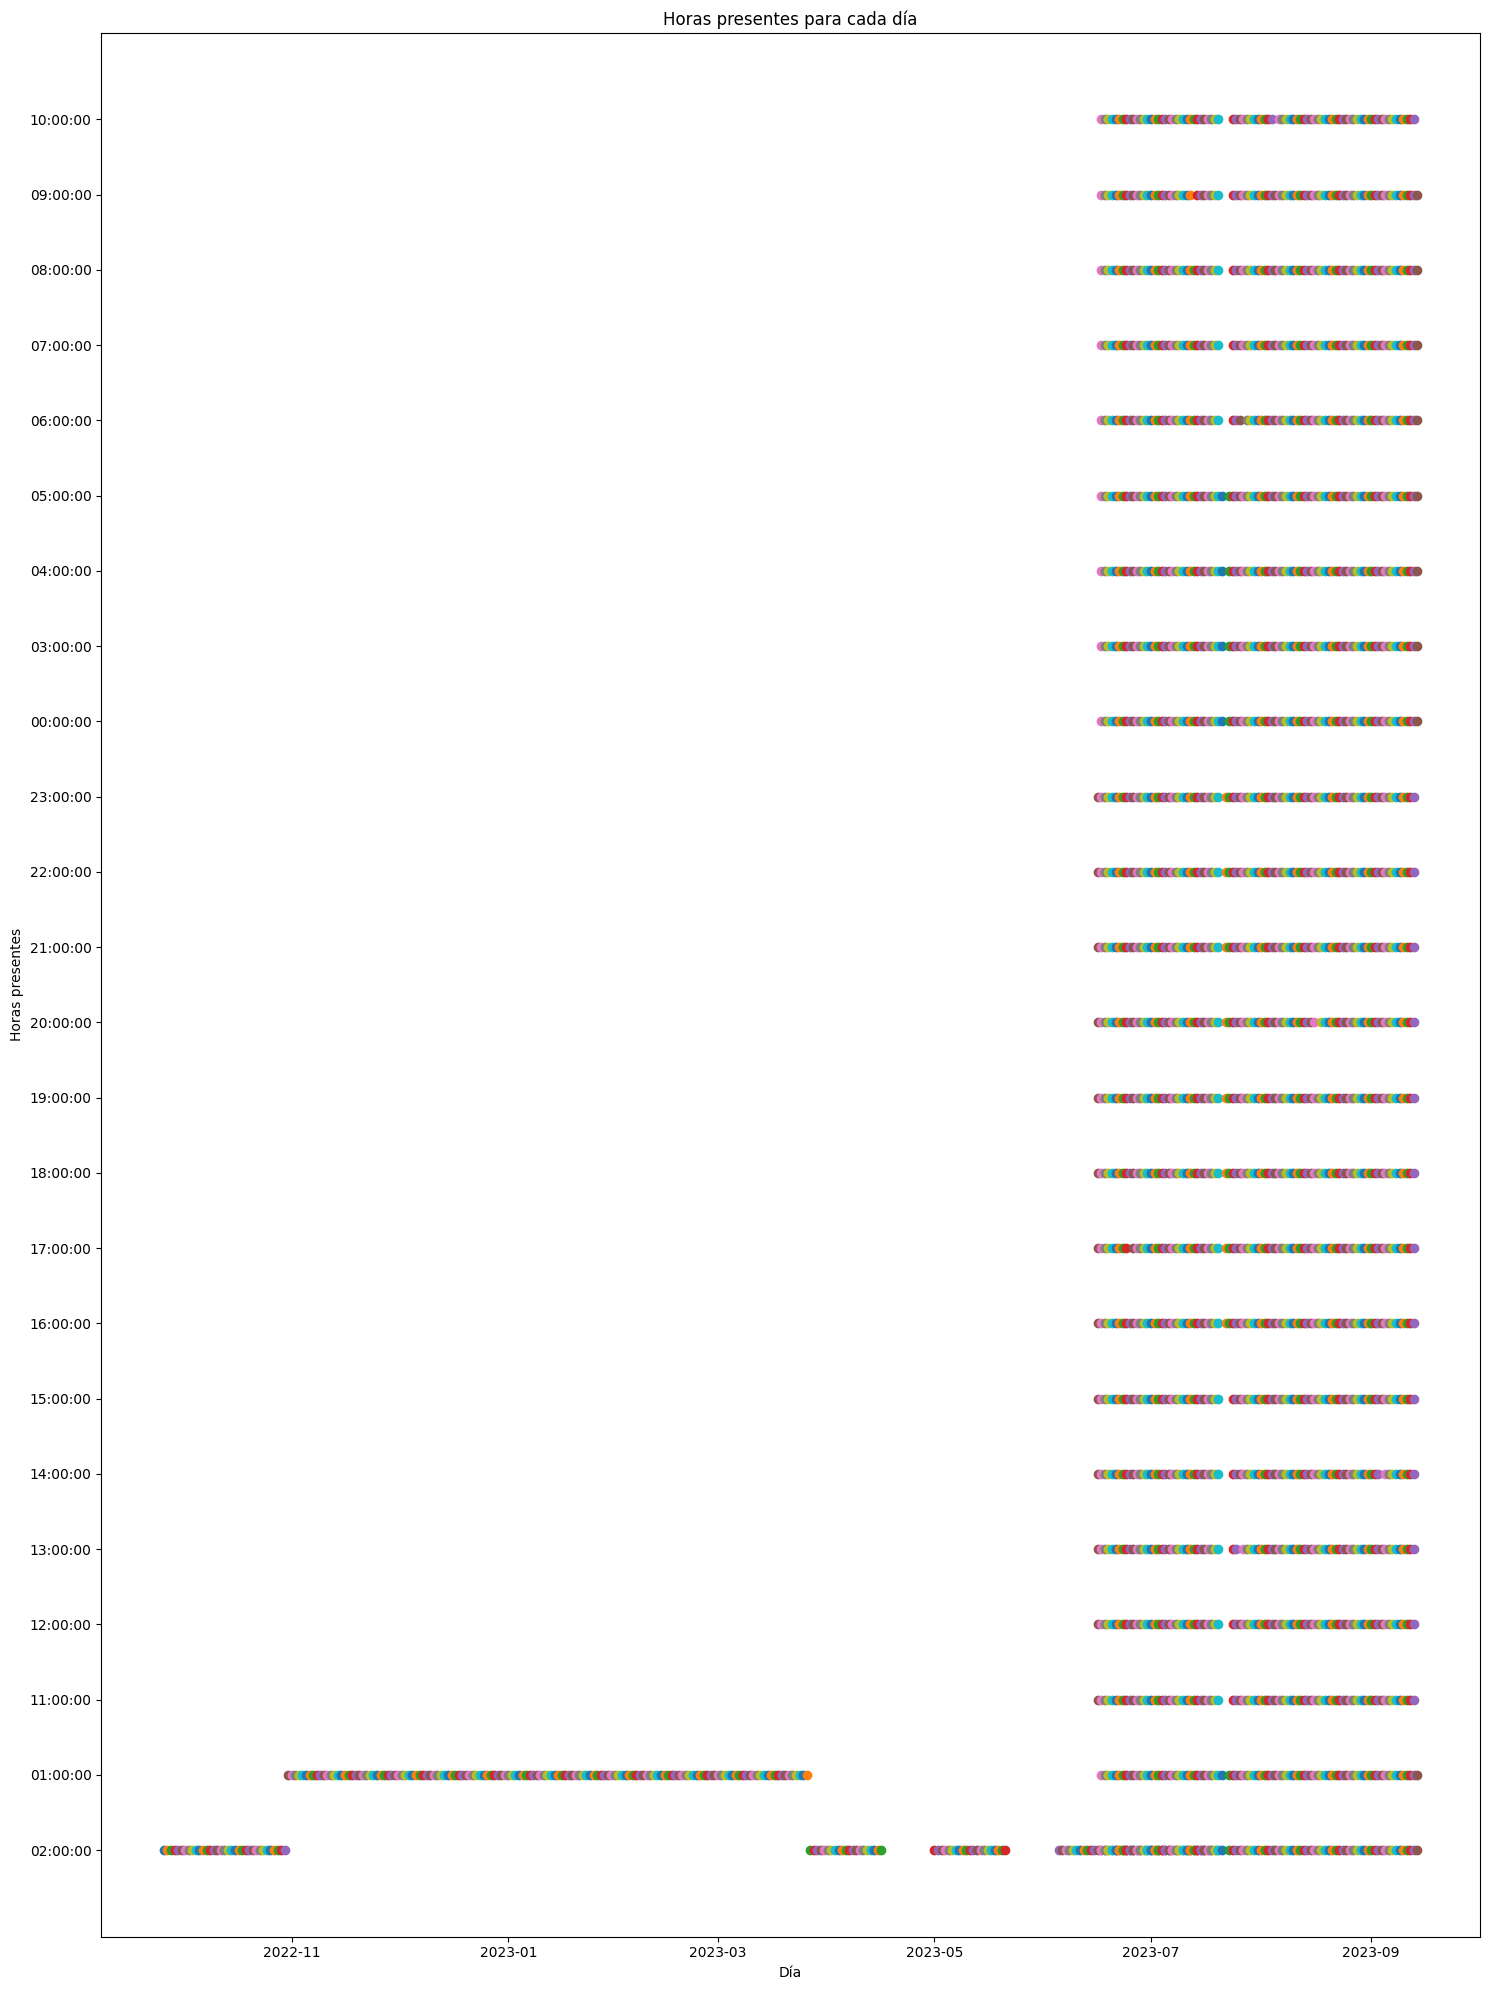

In [1704]:
data = data[['date','nivel']]
data_final = data.dropna(subset=[col for col in data.columns if col != 'date'], how='all')


data_final['fecha_hora'] = pd.to_datetime(data_final['date'], format='%Y-%m-%d %H:%M:%S')

# Extraemos el día de la fecha_hora
data_final['fecha'] = data_final['fecha_hora'].dt.date

# Agrupamos las fechas por día y obtenemos las horas presentes en cada día
horas_por_dia = data_final.groupby('fecha')['fecha_hora'].apply(lambda x: x.dt.strftime('%H:%M:%S').tolist())

# Crear una figura y ejes para la gráfica
fig, ax = plt.subplots(figsize=(15, 20))

# Graficar las horas presentes para cada día
for fecha, horas in horas_por_dia.items():
    ax.plot([fecha] * len(horas), horas, 'o', label=fecha)

# Configurar la apariencia de la gráfica
plt.xlabel('Día')
plt.ylabel('Horas presentes')
plt.title('Horas presentes para cada día')


# Mostrar la gráfica
plt.tight_layout()
plt.show()